# Importando base de dados


In [25]:
import pandas as pd 
import seaborn as sns 

In [2]:
dados = pd.read_csv('data/tips.csv')

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Traduzindo Colunas e campos

In [4]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear = {
    'total_bill':'valor_da_conta',
    'tip':'gorjeta',
    'dessert':'sobremesa',
    'day':'dia_da_semana',
    'time':'hora_do_dia', 
    'size':'total_de_pessoas'
}

In [6]:
type(dados)

pandas.core.frame.DataFrame

In [7]:
gorjetas = dados.rename(columns=renomear)

In [8]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [9]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = {
    'No': 'Não', 
    'Yes' : 'Sim'

}


In [11]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [12]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [13]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [14]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [15]:
dias = {

    'Sun':'Domingo',
    'Sat':'Sábado',
    'Thur':'Quinta',
    'Fri':'Sexta'
}

In [16]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [17]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [18]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [19]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [20]:
horario = {
    'Dinner':'Jantar',
     'Lunch':'Almoço'
}

In [21]:
gorjetas.hora_do_dia.map(horario)

0      Jantar
1      Jantar
2      Jantar
3      Jantar
4      Jantar
        ...  
239    Jantar
240    Jantar
241    Jantar
242    Jantar
243    Jantar
Name: hora_do_dia, Length: 244, dtype: object

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(horario)

In [23]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [26]:
sns.__version__

'0.11.0'

# Análise 1 - valor da conta e gorjeta

In [27]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

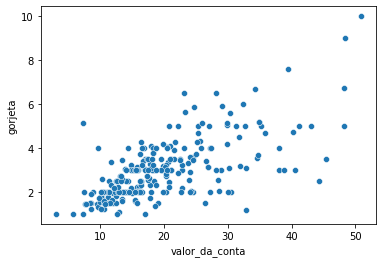

In [53]:
grafico_valor_gorjeta = sns.scatterplot(x = 'valor_da_conta',y = 'gorjeta', data= gorjetas)

**Visualmente, O valor da gorjeta aumenta conforme aumenta o valor da conta **

In [39]:
print(f'A base de dados contem {gorjetas.shape[0]} de registros \n')
print(f'Registros não nulos \n\n{gorjetas.count()}')


A base de dados contem 244 de registros 

Registros não nulos 

valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64


## Criando o campo porcentagem

In [40]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [46]:
gorjetas['porcentagem'] =  gorjetas.gorjeta/gorjetas.valor_da_conta

In [47]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447


In [48]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2) # Arredondando

In [49]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


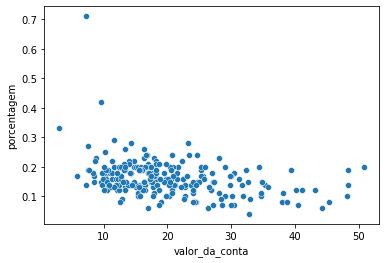

In [52]:
grafico_porcentagem_conta = sns.scatterplot(x ='valor_da_conta', y = 'porcentagem', data= gorjetas)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta **

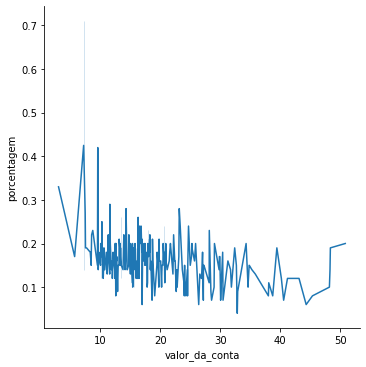

In [55]:
grafico_porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', data= gorjetas, kind='line')

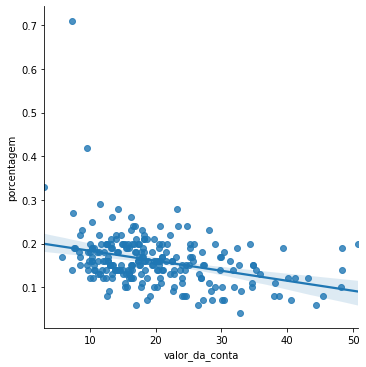

In [56]:
sns.lmplot(x='valor_da_conta', y ='porcentagem', data=gorjetas)

# Análise 2 - Sobremesa

In [57]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


In [59]:
gorjetas.query("sobremesa == 'Sim'").describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [60]:
gorjetas.query("sobremesa == 'Não'").describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


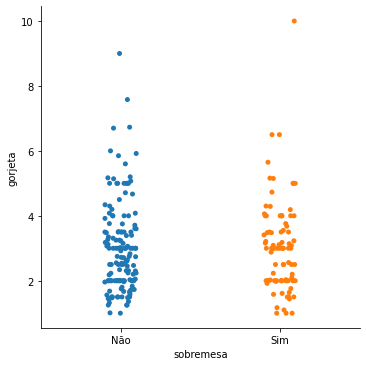

In [61]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

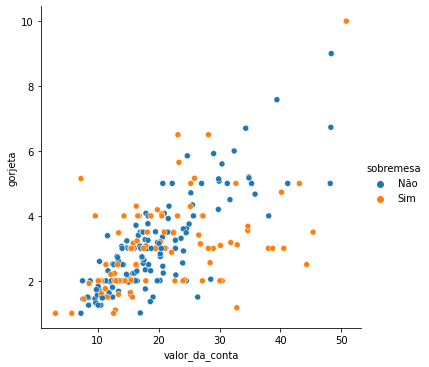

In [62]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',data=gorjetas)

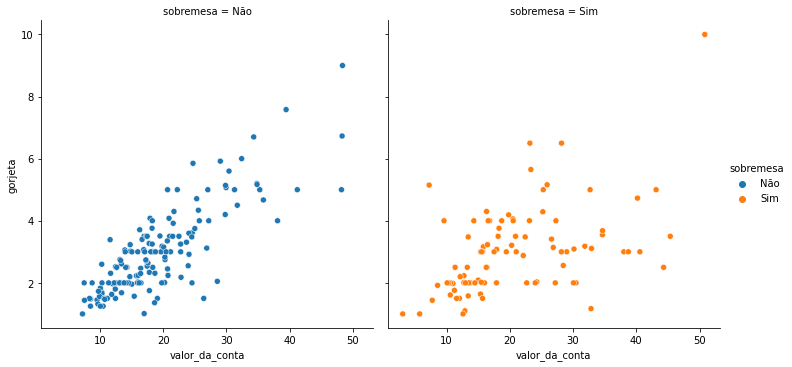

In [63]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',data=gorjetas, col='sobremesa')

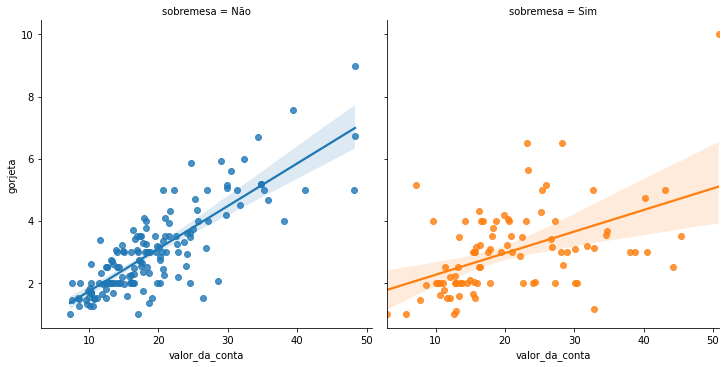

In [64]:
sns.lmplot(x='valor_da_conta',y='gorjeta',data=gorjetas, col='sobremesa',hue='sobremesa') # col coloca em graficos diferentes e o hue cores diferentes

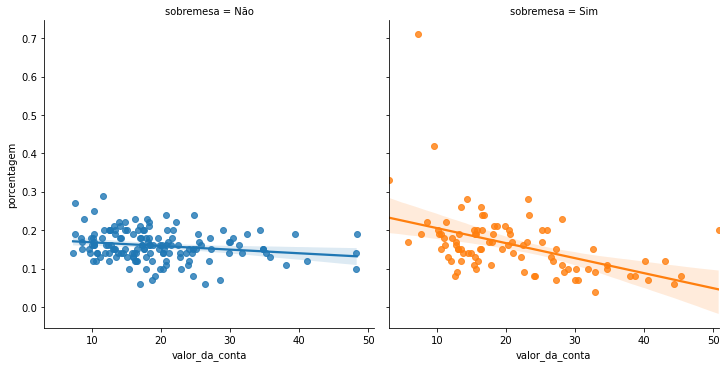

In [65]:
sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjetas, col='sobremesa',hue='sobremesa') 

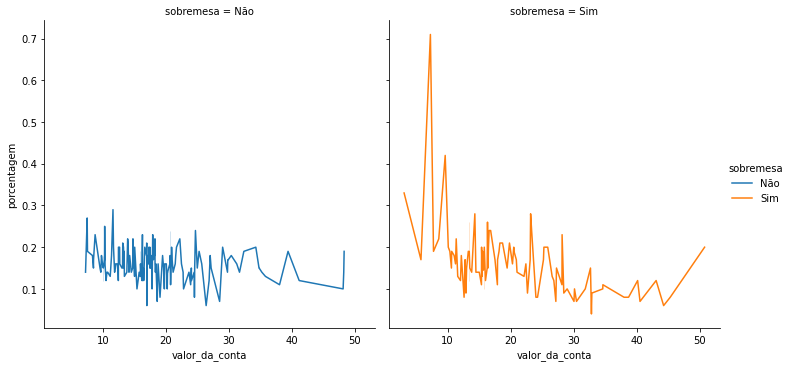

In [68]:
sns.relplot(x='valor_da_conta',y='porcentagem', data=gorjetas,col='sobremesa',hue='sobremesa',kind='line')

**Vizualmente existe uma diferença no valor da gorjeta dequeles que pediram sobremesa e nao pediram sobremesa **

## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [70]:
from scipy.stats import ranksums

In [73]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [74]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [76]:
r = ranksums(sobremesa,sem_sobremesa)

In [77]:
print(f'O valor do p-valeu é {r.pvalue}')

O valor do p-valeu é 0.5266635660124415


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da semana 

In [78]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

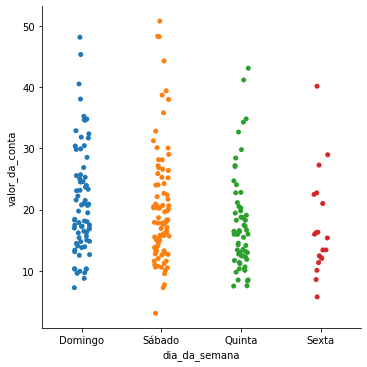

In [81]:
sns.catplot(x='dia_da_semana', y='valor_da_conta',data=gorjetas)

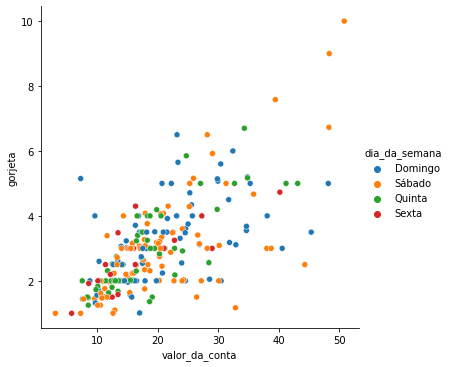

In [82]:
sns.relplot(x='valor_da_conta',y='gorjeta',data=gorjetas, hue='dia_da_semana')

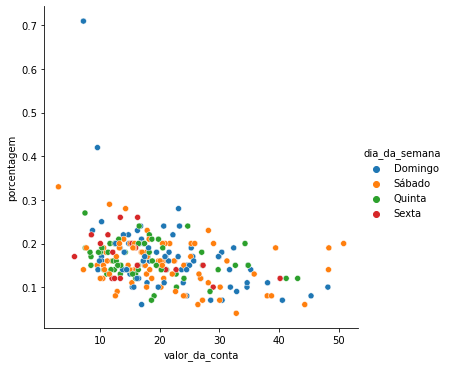

In [83]:
sns.relplot(x='valor_da_conta',y='porcentagem',data=gorjetas, hue='dia_da_semana')

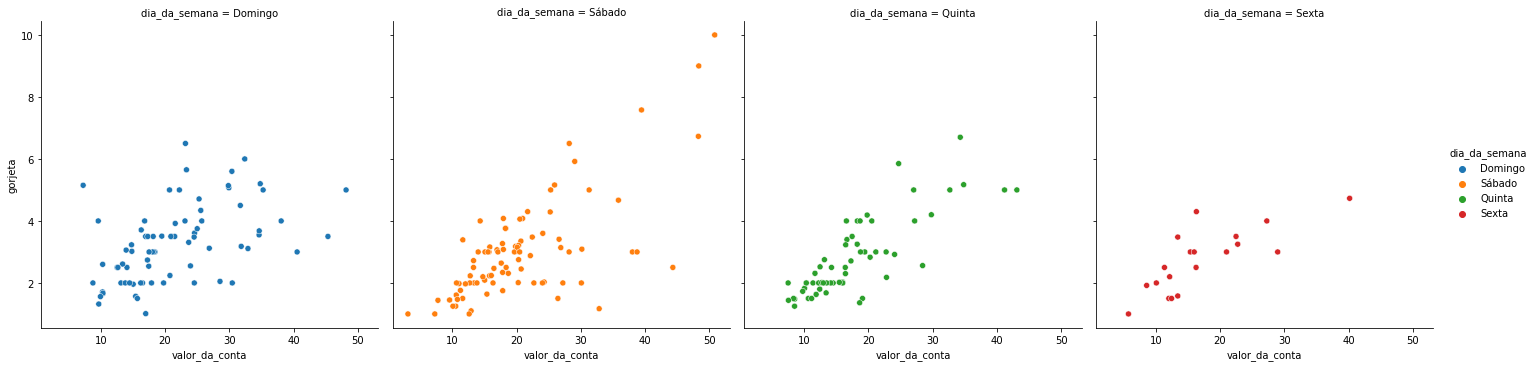

In [84]:
sns.relplot(x='valor_da_conta',y='gorjeta',data=gorjetas,hue='dia_da_semana',col='dia_da_semana')

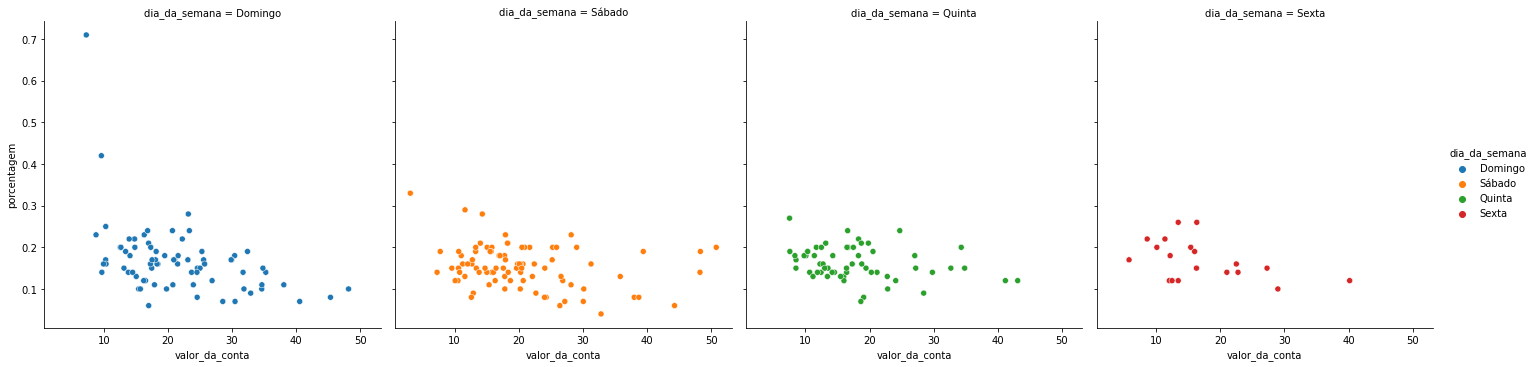

In [85]:
sns.relplot(x='valor_da_conta',y='porcentagem',data=gorjetas,hue='dia_da_semana',col='dia_da_semana')

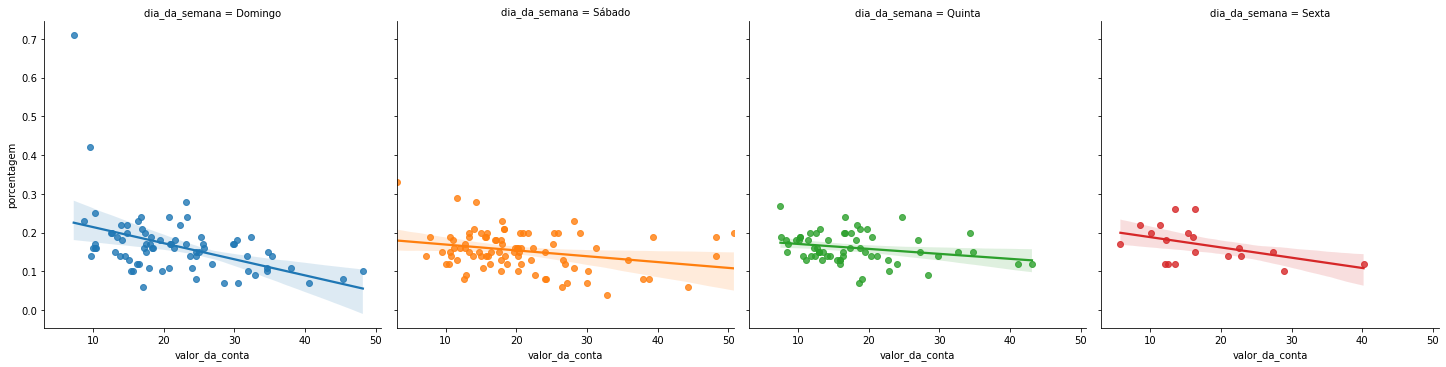

In [86]:
sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjetas,hue='dia_da_semana',col='dia_da_semana')

In [88]:
media_geral_gorjetas =gorjetas.gorjeta.mean()

In [89]:
print(f'A média geral das gorjetas é de : {media_geral_gorjetas}')

A média geral das gorjetas é de : 2.9982786885245902


In [91]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [93]:
print('Frequências dos dias')
gorjetas.dia_da_semana.value_counts()

Frequências dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese 

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sabádo e no domingo**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no sabádo e no domingo**

In [101]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo' ").valor_da_conta

In [100]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado' ").valor_da_conta

In [106]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print(f' O valor do p-value é {r2.pvalue}')

 O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sabádo e no domingo**

# Análise 4 - Hora do dia

In [107]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

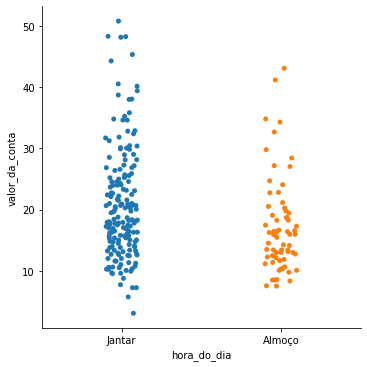

In [108]:
sns.catplot(x='hora_do_dia', y='valor_da_conta',data=gorjetas)

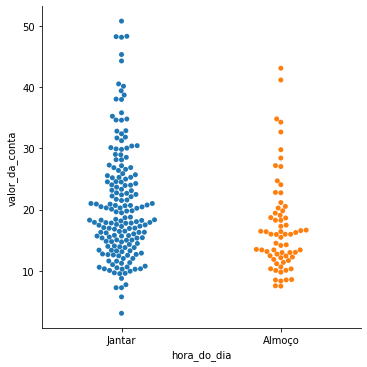

In [110]:
sns.catplot(x='hora_do_dia', y='valor_da_conta',data=gorjetas,kind='swarm') #  swarm retira os pontos muito 'grudados' um no outro

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

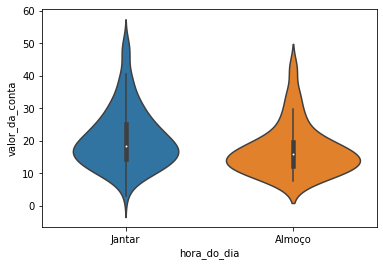

In [111]:
sns.violinplot(x='hora_do_dia',y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

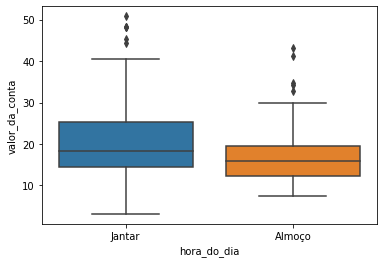

In [112]:
sns.boxplot(x='hora_do_dia',y='valor_da_conta', data=gorjetas)

In [115]:
almoco = gorjetas.query("hora_do_dia == 'Almoço' ").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

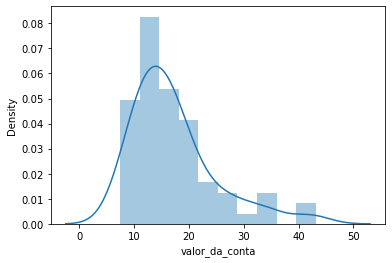

In [116]:
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_da_conta'>

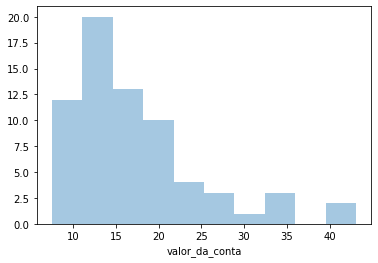

In [118]:
sns.distplot(almoco,kde=False)

In [119]:
jantar = gorjetas.query("hora_do_dia == 'Jantar' ").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

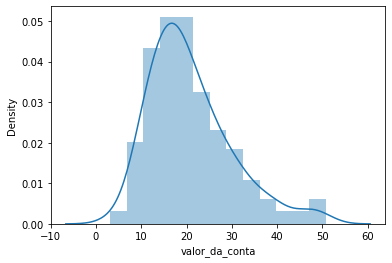

In [120]:
sns.distplot(jantar)

<AxesSubplot:xlabel='valor_da_conta'>

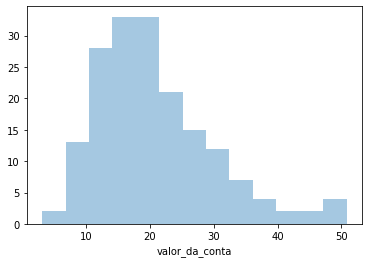

In [121]:
sns.distplot(jantar, kde=False)

In [125]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese 

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no Jantar e no Almoço**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no Jantar e no Almoço**

In [132]:
r3 = ranksums(jantar,almoco)
print(f'O valor do p-value é de {r3.pvalue}')


O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no Jantar e no Almoço**

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é igual no Jantar e no Almoço**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é igual no Jantar e no Almoço**

In [135]:
procentagem_almoco= gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [136]:
procentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [138]:
r4 = ranksums(procentagem_almoco,procentagem_jantar)
print(f'O valor do p-value é de {r4.pvalue}')


O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é igual no Jantar e no Almoço**
